In [1]:
import pandas as pd
titanic_db = pd.read_csv("./data/titanic.csv")

In [2]:
titanic_db.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_db.groupby("Sex").sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,135343,233,678,7286.00,218,204,13966.6628
male,262043,109,1379,13919.17,248,136,14727.2865


In [6]:
titanic_db.groupby("SibSp").sum()

,PassengerId,Survived,Pclass,Age,Parch,Fare
SibSp,,,,,,
0,276865,210,1430,14788.25,113,15620.7530
1,91903,112,430,5506.42,137,9226.8004
2,11548,13,66,565.50,18,1449.1041
3,5145,4,41,167.00,21,1102.5418
4,6869,3,54,127.00,27,573.4000
5,1684,0,15,51.00,10,234.5000
8,3372,0,21,NaN,14,486.8500


In [7]:
titanic_db.groupby("Sex").size()

Sex
female    314
male      577
dtype: int64

In [10]:
titanic_db.Age.sum()

21205.169999999998

In [12]:
titanic_db.Age.dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
18     31.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
27     19.0
30     40.0
33     66.0
34     28.0
35     42.0
37     21.0
38     18.0
       ... 
856    45.0
857    51.0
858    24.0
860    41.0
861    21.0
862    48.0
864    24.0
865    42.0
866    27.0
867    31.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, dtype: float64

In [13]:
import math

In [26]:
age_series = titanic_db.Age.dropna().apply(lambda age: math.floor(age / 10) * 10)
age_series.name = "Age_Group"

In [27]:
df = pd.concat(
    [titanic_db, age_series],
    axis=1,
)

In [28]:
titanic_db.Age_Group = titanic_db.Age_Group.fillna("Uncategoized")

AttributeError: 'DataFrame' object has no attribute 'Age_Group'

In [25]:
df.groupby("Age_Group").size()

Age_Group
0.0              62
10.0            102
20.0            220
30.0            167
40.0             89
50.0             48
60.0             19
70.0              6
80.0              1
Uncategoized    177
dtype: int64

In [29]:
import pandas as pd

In [31]:
df = pd.read_csv("../data/titanic.csv")

In [32]:
import math

In [33]:
age_series = df.Age.dropna().apply(lambda age: math.floor(age / 10) * 10)
age_series.name = "Age_Group"

In [34]:
df = pd.concat(
    [df, age_series],
    axis=1,
)

In [35]:
df.Age_Group = df.Age_Group.fillna("Uncategorized")

In [36]:
df.groupby("Age_Group").size()

Age_Group
0.0               62
10.0             102
20.0             220
30.0             167
40.0              89
50.0              48
60.0              19
70.0               6
80.0               1
Uncategorized    177
dtype: int64

In [37]:
df.groupby(["Pclass", "Sex"]).agg({"Survived": "mean"})

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [38]:
df.groupby("Pclass").agg({"Survived": "mean"})

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [39]:
df.groupby("Sex").agg({"Survived": "mean"})

,Survived
Sex,
female,0.742038
male,0.188908


In [41]:
pd.crosstab(
    df.Sex, df.Pclass,
    margins=True,
)   

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


In [43]:
df.pivot_table(
    "Survived",
    "Sex",
    "Pclass",     # aggfunc="mean" ( 생존률 ); ( 매출: SUM )
)

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [44]:
temp_df = df.groupby(["Pclass", "Sex"]).size().unstack(0)

In [45]:
result_df = temp_df.div(temp_df.sum(axis=1), axis=0)
# 비율을 연산하는 과정                .sum() => .div()
result_df

Pclass,1,2,3
Sex,,,
female,0.299363,0.242038,0.458599
male,0.211438,0.187175,0.601386


In [50]:
result_df.plot.bar(title="Titanic")           # 특정kwargs O, X
ax = result_df.plot(kind="barh", title="Titanic", stacked=True)

DataFrame. plot ( option )
import seaborn as sns

NameError: name 'DataFrame' is not defined

In [51]:
!curl "http://www.google.com/finance/historical?cid=542029859096076&startdate=Jan+1%2C+2015&enddate=Nov+9%2C+2016&num=30&ei=JtUiWLjvNsmS0gSN3LL4DA&output=csv" > kospi.csv

# -----------------------
# !curl URL > kospi.csv
# -----------------------
# !wget URL
# !mv _____ kospi.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23665    0 23665    0     0  57255      0 --:--:-- --:--:-- --:--:-- 57300


In [52]:
!wget "http://www.google.com/finance/historical?cid=542029859096076&startdate=Jan+1%2C+2015&enddate=Nov+9%2C+2016&num=30&ei=JtUiWLjvNsmS0gSN3LL4DA&output=csv"

--2016-11-09 08:04:20--  http://www.google.com/finance/historical?cid=542029859096076&startdate=Jan+1%2C+2015&enddate=Nov+9%2C+2016&num=30&ei=JtUiWLjvNsmS0gSN3LL4DA&output=csv
Resolving www.google.com (www.google.com)... 216.58.197.164, 2404:6800:4003:c01::69
Connecting to www.google.com (www.google.com)|216.58.197.164|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/vnd.ms-excel]
Saving to: ‘historical?cid=542029859096076&startdate=Jan+1%2C+2015&enddate=Nov+9%2C+2016&num=30&ei=JtUiWLjvNsmS0gSN3LL4DA&output=csv’

    [ <=>                                   ] 23,665      --.-K/s   in 0.06s   

2016-11-09 08:04:20 (360 KB/s) - ‘historical?cid=542029859096076&startdate=Jan+1%2C+2015&enddate=Nov+9%2C+2016&num=30&ei=JtUiWLjvNsmS0gSN3LL4DA&output=csv’ saved [23665]



In [53]:
!mv ./historical\?cid\=542029859096076\&startdate\=Jan+1%2C+2015\&enddate\=Nov+9%2C+2016\&num\=30\&ei\=JtUiWLjvNsmS0gSN3LL4DA\&output\=csv kospi2016.csv

In [56]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [58]:
kospi_df = pd.read_csv(
    "./kospi.csv",
    parse_dates=[0],
    index_col=0,
)

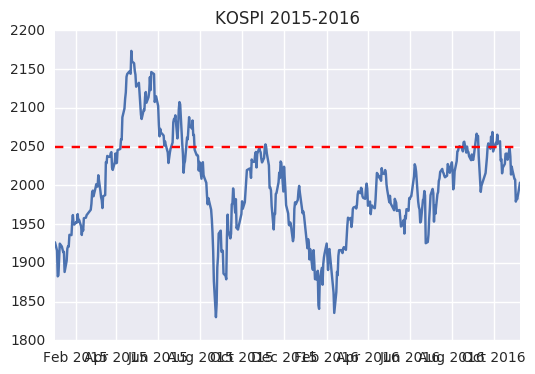

In [62]:
fig, ax = plt.subplots(1, 1)
ax.plot(
    kospi_df.index,
    kospi_df.Close,     # TOHLC TOCHL ...
)

ax.set_title("KOSPI 2015-2016")
ax.axhline(y=2050, color="red", linestyle="--")

(735964.0, 736269.0)

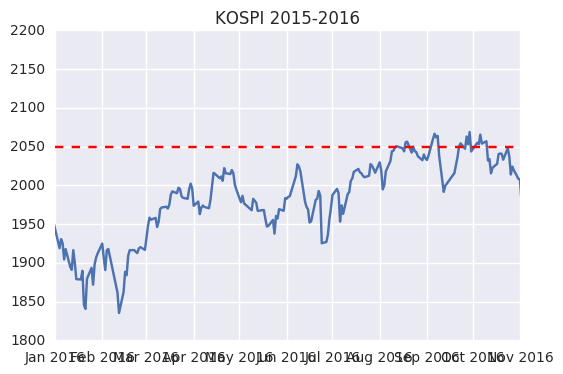

In [63]:
fig, ax = plt.subplots(1, 1)
ax.plot(
    kospi_df.index,
    kospi_df.Close,     # TOHLC TOCHL ...
)

ax.set_title("KOSPI 2015-2016")
ax.axhline(y=2050, color="red", linestyle="--")

# DataFrame 은 그대로 유지하지만, 그래프의 x 축 범위 
ax.set_xlim([
    "2016-01-01", "2016-11-01",
])

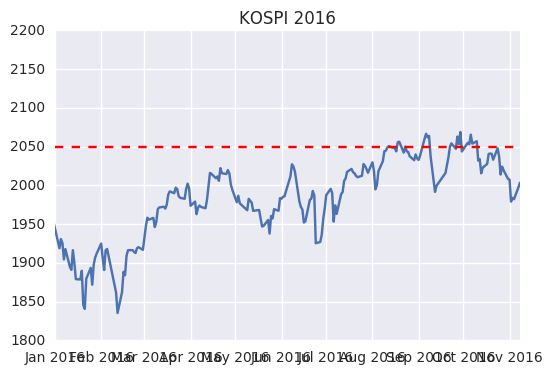

In [64]:
fig, ax = plt.subplots(1, 1)
ax.plot(
    kospi_df.index,
    kospi_df.Close,     # TOHLC TOCHL ...
)

ax.set_title("KOSPI 2016")
ax.axhline(y=2050, color="red", linestyle="--")

# DataFrame 은 그대로 유지하지만, 그래프의 x 축 범위 
ax.set_xlim([
    "2016-01-01", "2016-11-08",
])

fig.savefig("kospi-2016.png")
# 삼성전자 의 주가 ( 2016년도 )

In [66]:
kospi_df.head()

,Open,High,Low,Close,Volume
﻿Date,,,,,
2016-11-08,2009.56,2010.17,1994.33,2003.38,239579000
2016-11-07,1997.58,2001.74,1992.14,1997.58,210333000
2016-11-04,1983.87,1985.29,1976.57,1982.02,227776000
2016-11-03,1974.93,1988.82,1973.58,1983.80,272728000
2016-11-02,1995.41,1997.46,1976.34,1978.94,333529000


In [67]:
!curl "http://www.google.com/finance/historical?cid=151610035517112&startdate=Jan+1%2C+2016&enddate=Nov+9%2C+2016&num=30&ei=UNsiWJGYEsLk0gTk5YHQDg&output=csv" > "samsung.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12722    0 12722    0     0  32677      0 --:--:-- --:--:-- --:--:-- 32704


In [68]:
samsung_df = pd.read_csv("./samsung.csv", parse_dates=[0], index_col=0)

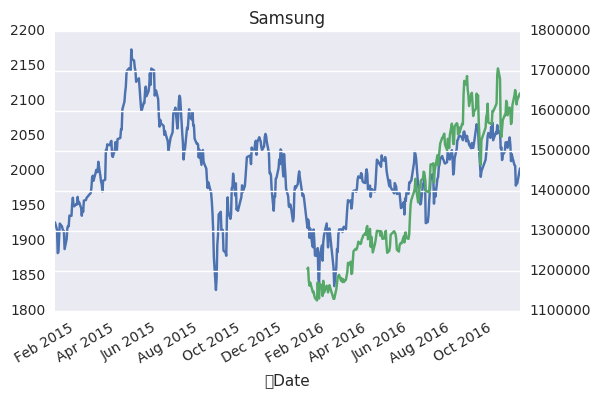

In [70]:
ax = samsung_df.Close.plot(
    # title=""
    secondary_y=True,
    ax=kospi_df.Close.plot(),
)

ax.set_title("Samsung")

(735964.0, 736276.0)

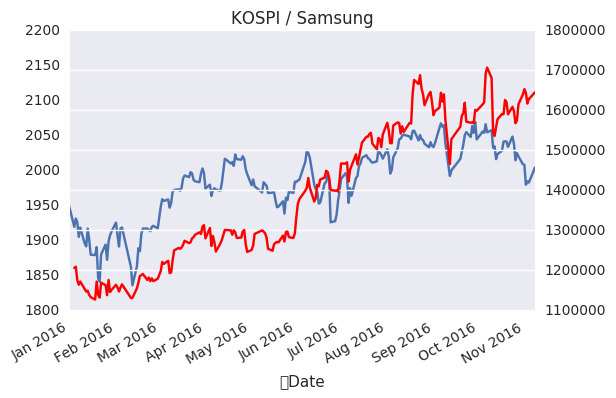

In [71]:
ax = samsung_df.Close.plot(
    style="r-",
    # title=""
    secondary_y=True,
    ax=kospi_df.Close.plot(),
)

ax.set_title("KOSPI / Samsung")
ax.set_xlim(["2016-01-01", "2016-11-08"])

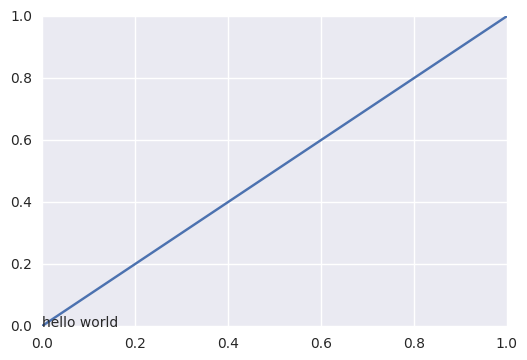

In [72]:
plt.plot([0, 1], [0, 1])
plt.text(0, 0, "hello world")

In [73]:
!curl "http://www.google.com/finance/historical?q=KRX%3A192820&ei=cd0iWLnJGYi20wSenYG4Cg&output=csv" > cosmax.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13699    0 13699    0     0  23857      0 --:--:-- --:--:-- --:--:-- 23824


In [74]:
cosmax_df = pd.read_csv(
    "./cosmax.csv",
    parse_dates=[0],
    index_col=0,
)

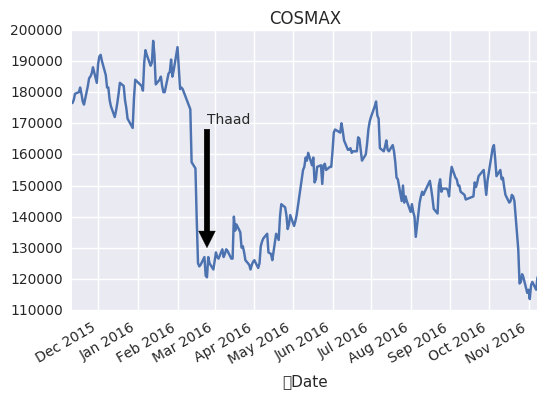

In [75]:
cosmax_df.Close.plot(
    title="COSMAX"
)

plt.annotate(
    "Thaad",
    xy=("2016-02-24", 130000),
    xytext=("2016-02-24", 170000),
    arrowprops=dict(facecolor="black")
)

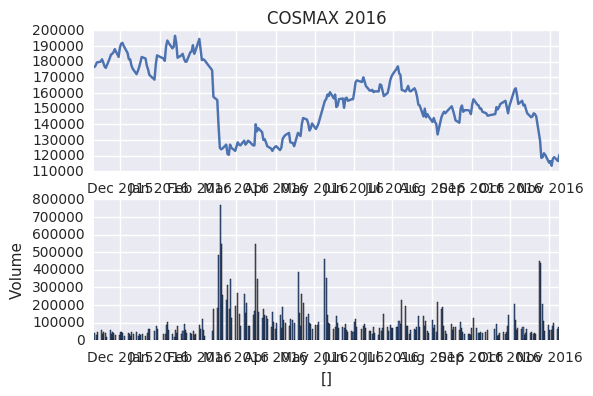

In [76]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(
    cosmax_df.index,
    cosmax_df.Close,
)
ax1.set_title("COSMAX 2016")
ax2.set_ylabel("Close")

ax2.bar(
    cosmax_df.index,
    cosmax_df.Volume,
)

ax2.set_ylabel("Volume")
ax2.set_xlabel([])